In [5]:
# !pip install tensorflow

In [173]:
import os
import pathlib
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout,BatchNormalization
from keras import Sequential,Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks  import ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy

from tensorflow.keras import layers, models


from tensorflow.keras.preprocessing.image import load_img

### Data Reading / Data Understanding

In [6]:
# Defining Path for images
train_images_path = 'Org Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
test_images_path = 'Org Skin cancer ISIC The International Skin Imaging Collaboration/Test/'

In [7]:
# Getting count of Images 
train_images = pathlib.Path(train_images_path)
image_count_train = len(list(train_images.glob('*/*.jpg')))
print(image_count_train)

2239


In [8]:
# Getting count of Images 
test_images = pathlib.Path(test_images_path)
image_count_test = len(list(test_images.glob('*/*.jpg')))
print(image_count_test)

118


### Dataset Creation

In [9]:
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

In [10]:
# Loading the train data

train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_images,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(IMG_HEIGHT,IMG_WIDTH),
                                                               batch_size=BATCH_SIZE, 
                                                               label_mode='categorical',
                                                               subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [11]:
## Storing Class Names in a variable for further reference 
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [12]:
# Loading the validation data

val_ds = tf.keras.preprocessing.image_dataset_from_directory(train_images,
                                                             seed=123,
                                                             validation_split=0.2,
                                                             image_size=(IMG_HEIGHT,IMG_WIDTH),
                                                             batch_size=BATCH_SIZE, 
                                                             label_mode='categorical',
                                                             subset='validation')
 

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


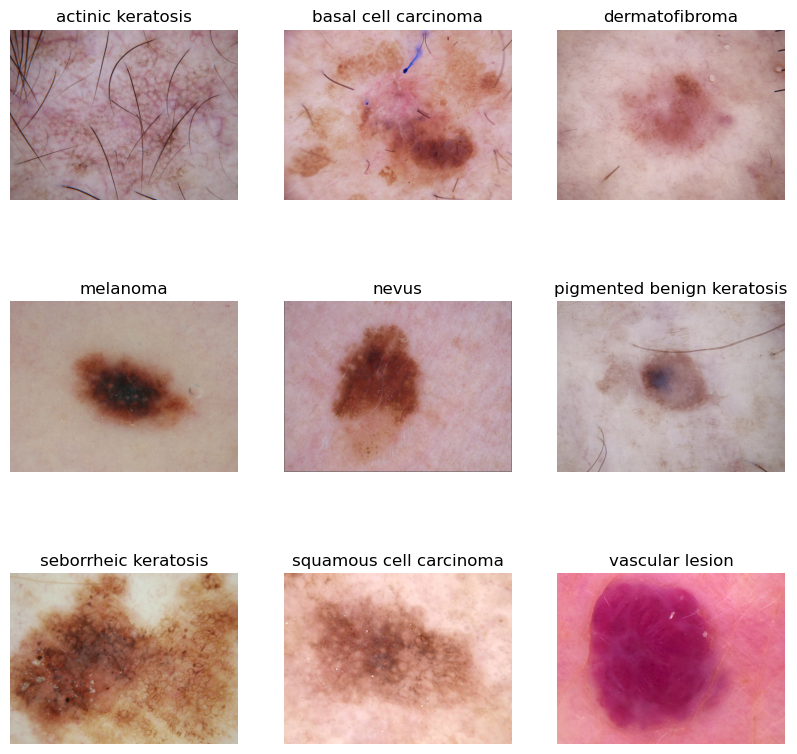

In [177]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    image = plt.imread(
      str(list(train_images.glob(f'{class_names[i]}/*.jpg'))[1]))
    plt.title(class_names[i])
    plt.imshow(image)
    plt.axis('off')

### Model Building & training  

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [179]:
# 1. Building the CNN Model
model = models.Sequential([
    
    # Rescaling layer to normalize pixel values
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    
    # Convolutional and pooling layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 classes
])

In [180]:
# Defining  optimiser and loss function
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])


In [181]:
# View the summary of all layers
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 41, 41, 128)     

In [ ]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs 
)

Epoch 1/20
169/169 [==============================] - 91s 530ms/step - loss: 1.8275 - accuracy: 0.2953 - val_loss: 1.5026 - val_accuracy: 0.3682
Epoch 2/20
169/169 [==============================] - 87s 517ms/step - loss: 1.4729 - accuracy: 0.4425 - val_loss: 1.3388 - val_accuracy: 0.4766
Epoch 3/20
169/169 [==============================] - 87s 513ms/step - loss: 1.2600 - accuracy: 0.5351 - val_loss: 1.2486 - val_accuracy: 0.5575
Epoch 4/20
169/169 [==============================] - 87s 514ms/step - loss: 1.1082 - accuracy: 0.5970 - val_loss: 1.0856 - val_accuracy: 0.5947
Epoch 5/20
169/169 [==============================] - 87s 515ms/step - loss: 0.9410 - accuracy: 0.6558 - val_loss: 0.9857 - val_accuracy: 0.6474
Epoch 6/20
169/169 [==============================] - 87s 518ms/step - loss: 0.7553 - accuracy: 0.7237 - val_loss: 0.9068 - val_accuracy: 0.6607
Epoch 7/20
 52/169 [========>.....................] - ETA: 1:00 - loss: 0.5813 - accuracy: 0.7955

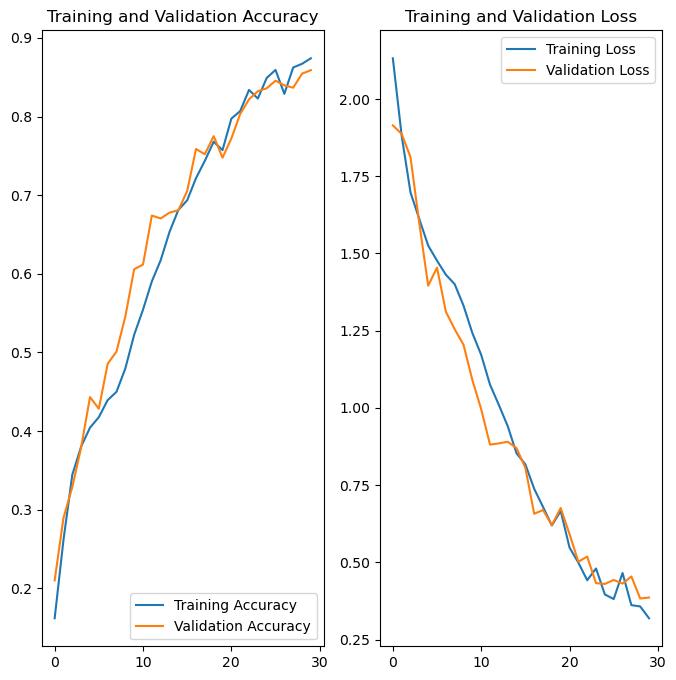

In [178]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 36ms/step
Actual Class actinic keratosis
Predictive Class basal cell carcinoma


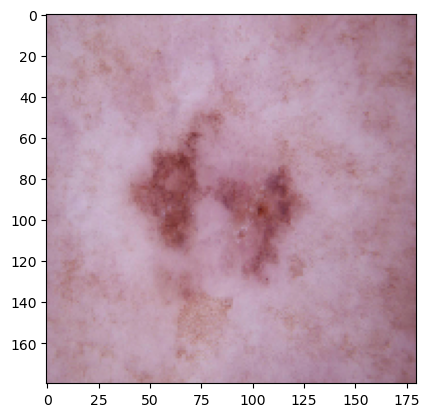

In [62]:
from glob import glob
Test_image_path = os.path.join(test_images, class_names[0], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[0] +'\n'+ "Predictive Class "+pred_class )

### Observations 

 - The model is overfitting as the training accuracy is significantly higher than the validation accuracy.
 - the model is learning, but there is room for improvement in terms of overfitting and validation performance.

### Model Building & training - 2

In [ ]:
# Due to limited training data , the above model we created seems to overfit , lets create a new model with a layer for data 
# augmentation so that model can have training on more images that would be generated based on below augmentation attributes

In [147]:
# Adding data augmentation as a layer helps the model to avoid overfitting by
# artificially increasing the diversity of the training dataset

data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(IMG_HEIGHT, 
                                                              IMG_WIDTH,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.2)
  ]
)

In [148]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [149]:
# 1. Building the CNN Model
model = models.Sequential([
    # Rescaling layer to normalize pixel values
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    
    data_augmentation,
    
    # Convolutional and pooling layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 classes
])

In [27]:
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                 

In [29]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs 
)

Epoch 1/20
56/56 [==============================] - 46s 792ms/step - loss: 1.9526 - accuracy: 0.2539 - val_loss: 1.6187 - val_accuracy: 0.4541
Epoch 2/20
56/56 [==============================] - 32s 576ms/step - loss: 1.5560 - accuracy: 0.4520 - val_loss: 1.4779 - val_accuracy: 0.4765
Epoch 3/20
56/56 [==============================] - 40s 717ms/step - loss: 1.5128 - accuracy: 0.4760 - val_loss: 1.4202 - val_accuracy: 0.5414
Epoch 4/20
56/56 [==============================] - 39s 653ms/step - loss: 1.4646 - accuracy: 0.4738 - val_loss: 1.5781 - val_accuracy: 0.4340
Epoch 5/20
56/56 [==============================] - 37s 657ms/step - loss: 1.4032 - accuracy: 0.4922 - val_loss: 1.3995 - val_accuracy: 0.5280
Epoch 6/20
56/56 [==============================] - 33s 591ms/step - loss: 1.3793 - accuracy: 0.4944 - val_loss: 1.4337 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 33s 586ms/step - loss: 1.3340 - accuracy: 0.5223 - val_loss: 1.3262 - val_accuracy: 0.5324

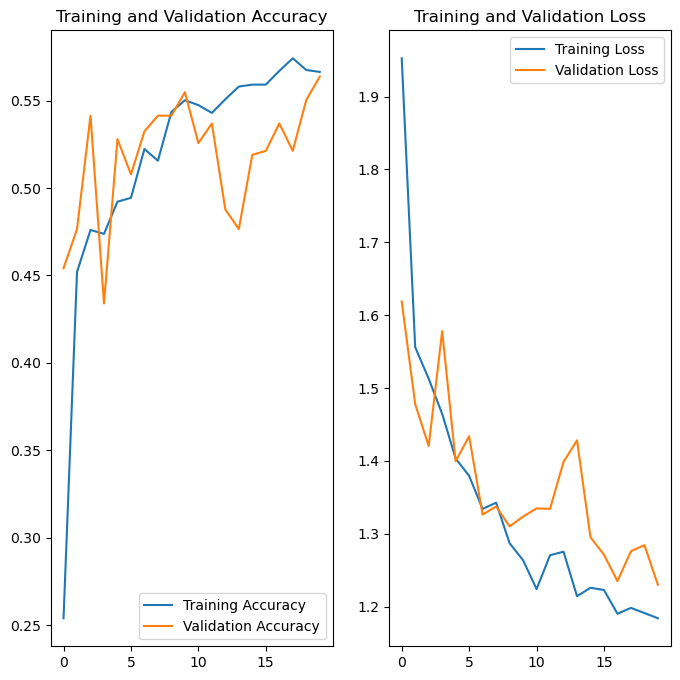

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model Testing  - 2

1/1 [==============================] - 0s 377ms/step
Actual Class actinic keratosis
Predictive Class basal cell carcinoma


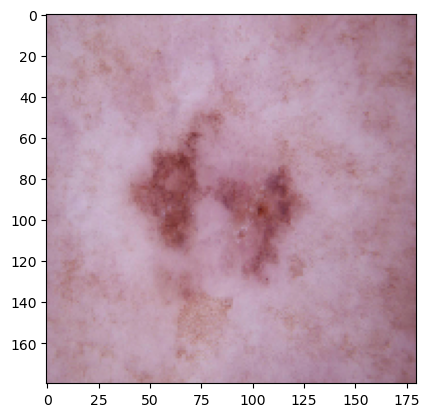

In [157]:
from glob import glob
Test_image_path = os.path.join(test_images, class_names[0], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[0] +'\n'+ "Predictive Class "+pred_class )

### Model Building & training - 3

## Class Imbalance 

In [32]:
##Find the distribution of classes in the training dataset
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(train_images_path)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


### Class Distribution QA 
Which class has the least number of samples? <br/>
seborrheic keratosis (77)

Which classes dominate the data in terms of the proportionate number of samples? <br/>
pigmented benign keratosis  (462)

In [33]:
train_images_path

'Org Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

In [35]:
train_images_path = 'Augmented Skin cancer ISIC The International Skin Imaging Collaboration/Train/' 

In [36]:
train_images = pathlib.Path(train_images_path)
test_images = pathlib.Path(test_images_path)

### Rectify class imbalances present in the training dataset with Augmentor library.

In [38]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


In [39]:
import Augmentor
# max_images = max([len(os.listdir(train_images / i)) for i in class_names])
# max_images = round(max_images / 100) * 100 
addCount = 500
for i in class_names:
    train_images_sub = train_images /  i
    classes_image_count_train = len(list(train_images_sub.glob('*.jpg')))
    p = Augmentor.Pipeline(train_images_sub)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(addCount)

# On a side note , would like to add here that I initially thought to get the maximum number of images for a
# class which was coming around 463 , so Ideally to remove the class imbalance , we can take a round of max to its nearest 
# 100 which was coming 500. But having this set of images was failing to achieve the accuracy , my accuracy at that point
# was coming around 50 to 60 % only , so I added 500 more images to each of the class and the model performance got increase
# which means that apart of taking care of class imbalance , we should also take care of having a good count 
# of images so that model can learn better 

Initialised with 114 image(s) found.
Output directory set to Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D61C9CC5D0>: 100%|██████████| 500/500 [00:03<00:00, 161.80 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D61C9766D0>: 100%|██████████| 500/500 [00:02<00:00, 168.35 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D60498E010>: 100%|██████████| 500/500 [00:02<00:00, 167.70 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x1D61C9DCF10>: 100%|██████████| 500/500 [00:16<00:00, 30.65 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1D61C95BA90>: 100%|██████████| 500/500 [00:16<00:00, 30.29 Samples/s]                   


Initialised with 462 image(s) found.
Output directory set to Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D60C1BC290>: 100%|██████████| 500/500 [00:03<00:00, 153.16 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1D6048DC210>: 100%|██████████| 500/500 [00:08<00:00, 60.15 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D61C9CD290>: 100%|██████████| 500/500 [00:03<00:00, 158.16 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to Augmented Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D65F1EFE10>: 100%|██████████| 500/500 [00:02<00:00, 180.08 Samples/s]                  


In [40]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_images,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(IMG_HEIGHT,IMG_WIDTH),
                                                               batch_size=BATCH_SIZE, 
                                                               label_mode='categorical',
                                                               subset='training')

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [41]:
# Loading the validation data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(train_images,
                                                             seed=123,
                                                             validation_split=0.2,
                                                             image_size=(IMG_HEIGHT,IMG_WIDTH),
                                                             batch_size=BATCH_SIZE, 
                                                             label_mode='categorical',
                                                             subset='validation')
 

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [68]:
class_names = train_ds.class_names

In [151]:
model = tf.keras.Sequential([
    
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(IMG_HEIGHT,IMG_WIDTH,3)), 
    
    #First Convulation layer
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    
    #First Convulation layer
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    
    #First Convulation layer
    layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),   
    
    layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),  
    
    layers.Dropout(0.5),
    
    #Flatten Layer
    ##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
    layers.Flatten(),

    #Dense Layer
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.25),
    
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.25),
    
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.25),
    
    #Dense Layer with softmax activation function.
    #Softmax is an activation function that scales numbers/logits into probabilities.
    layers.Dense(len(class_names),activation='softmax')

])


In [152]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [153]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [154]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 41, 41, 128)     

In [155]:
epochs = 30

In [156]:
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[reduce_lr])

Epoch 1/30
169/169 [==============================] - 133s 708ms/step - loss: 2.1317 - accuracy: 0.1619 - val_loss: 1.9146 - val_accuracy: 0.2101 - lr: 0.0010
Epoch 2/30
169/169 [==============================] - 111s 655ms/step - loss: 1.8808 - accuracy: 0.2617 - val_loss: 1.8868 - val_accuracy: 0.2895 - lr: 0.0010
Epoch 3/30
169/169 [==============================] - 104s 613ms/step - loss: 1.6972 - accuracy: 0.3446 - val_loss: 1.8117 - val_accuracy: 0.3289 - lr: 0.0010
Epoch 4/30
169/169 [==============================] - 102s 604ms/step - loss: 1.6108 - accuracy: 0.3804 - val_loss: 1.5965 - val_accuracy: 0.3794 - lr: 0.0010
Epoch 5/30
169/169 [==============================] - 101s 598ms/step - loss: 1.5255 - accuracy: 0.4043 - val_loss: 1.3957 - val_accuracy: 0.4432 - lr: 0.0010
Epoch 6/30
169/169 [==============================] - 102s 601ms/step - loss: 1.4765 - accuracy: 0.4177 - val_loss: 1.4541 - val_accuracy: 0.4284 - lr: 0.0010
Epoch 7/30
169/169 [==========================

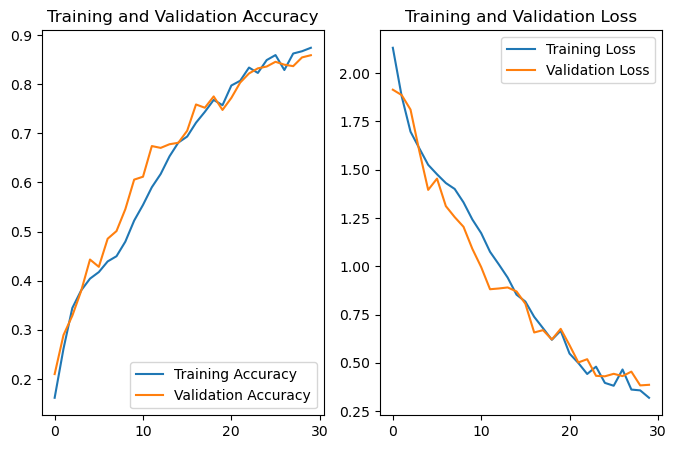

In [159]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Above charts clearly denotes that model has been able to achieve a good performance on adding augmentation techniques to the 
existing set of images. However, the model seems to perform well around 20 epoch and post that point , validation accuracy 
has stopped improving and also the difference between training and validation accuracy is also getting increased after 20 epochs

In [ ]:
!pip install tabulate

In [160]:
from tabulate import tabulate
data = []
for epoch, train_acc, val_acc, train_loss, val_loss in zip(epochs_range, acc, val_acc, loss, val_loss):
    data.append([epoch, train_acc, val_acc, train_loss, val_loss])

headers = ["Epochs", "Training Accuracy", "Validation Accuracy", "Training Loss", "Validation Loss"]

table = tabulate(data, headers, tablefmt="pipe")
print(table)

|   Epochs |   Training Accuracy |   Validation Accuracy |   Training Loss |   Validation Loss |
|---------:|--------------------:|----------------------:|----------------:|------------------:|
|        0 |            0.161907 |              0.210097 |        2.13167  |          1.91458  |
|        1 |            0.261684 |              0.289532 |        1.88083  |          1.88682  |
|        2 |            0.344585 |              0.328879 |        1.69722  |          1.81167  |
|        3 |            0.380378 |              0.379362 |        1.61083  |          1.59648  |
|        4 |            0.404303 |              0.443207 |        1.52554  |          1.39569  |
|        5 |            0.417656 |              0.428359 |        1.47652  |          1.4541   |
|        6 |            0.439355 |              0.485523 |        1.43119  |          1.31173  |
|        7 |            0.449926 |              0.501114 |        1.40056  |          1.25476  |
|        8 |            0.4795

In [161]:
def getMaxRecordForParameters(colIndex, tag):
    # Find the maximum value based on colIndex
    max_data = max(data, key=lambda x: x[colIndex])
    max_value = max_data[colIndex]
    epoch_with_max_value = max_data[0]
    print(f"{tag}: {max_value} (Epoch {epoch_with_max_value})")

In [162]:
# Find the maximum training accuracy and corresponding epoch number
getMaxRecordForParameters(1,"Training Accuracy")
getMaxRecordForParameters(2,"Validation Accuracy") 

Training Accuracy: 0.8740726709365845 (Epoch 29)
Validation Accuracy: 0.8589457869529724 (Epoch 29)


Training Accuracy: It reaches a very high value of approximately 87% after 29 epochs. This high training accuracy indicates that the model is overfitting data and even might be memorizing the data since the validation accuracy is not near to this.

Validation Accuracy: On the other hand, the validation accuracy, which is a measure of the model's performance on unseen data, reaches around 85%  after epoch 29. 


## Testing the Model

1/1 [==============================] - 0s 46ms/step
Actual Class nevus
Predictive Class nevus


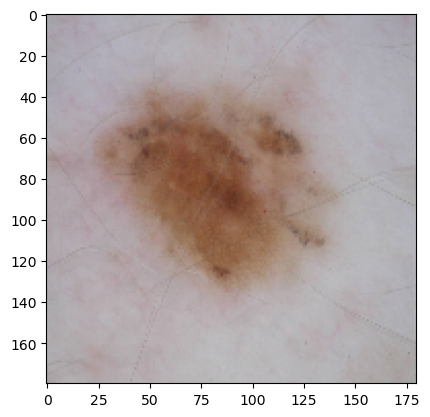

In [168]:
## Though this was not part of the assignment 

from glob import glob
Test_image_path = os.path.join(test_images, class_names[4], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[4] +'\n'+ "Predictive Class "+pred_class )